In [55]:
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic") # 한글표시 (window)
plt.rc("axes", unicode_minus=False) # x,y축 (-)부호 표시
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")
import seaborn as sns
import folium 
from matplotlib.dates import DateFormatter

# 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# 모든 컬럼이 표시되도록 max_columns 의 수를 지정합니다.
pd.options.display.max_columns = 39

---

In [75]:
data1 = pd.read_csv("Downloads\\서울특별시 공공자전거 대여소별 이용정보(월별)_23.1-6 (1).csv", encoding="cp949")
data1.shape

(16306, 5)

In [76]:
data1[:10]

,자치구,대여소명,기준년월,대여건수,반납건수
0,강남구,2301. 현대고등학교 건너편,202301,383,439
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),202301,433,446
2,강남구,2303. 논현역 10번출구,202301,648,508
3,강남구,2304. 대현그린타워,202301,76,55
4,강남구,2305. MCM 본사 직영점 앞,202301,172,179
5,강남구,2306. 압구정역 2번 출구 옆,202301,865,830
6,강남구,2307. 압구정 한양 3차 아파트,202301,201,149
7,강남구,2308. 압구정파출소 앞,202301,516,543
8,강남구,2309. 청담역(우리들병원 앞),202301,165,75
9,강남구,2310. 청담동 맥도날드 옆(위치),202301,193,207


In [77]:
data1['반납건수'] = data1['반납건수'].str.replace(',', '').str.strip()
data1['반납건수'] = pd.to_numeric(data1['반납건수'], errors='coerce')
data1['반납건수'].fillna(0, inplace=True)
monthly_sum = data1.groupby('기준년월')['반납건수'].sum().reset_index()

data1['대여건수'] = data1['대여건수'].str.replace(',', '').astype(int)
monthly_rentals = data1.groupby('기준년월')['대여건수'].sum().reset_index()

df1 = monthly_rentals.pivot_table(index="기준년월",values="대여건수")
df2 = monthly_sum.pivot_table(index="기준년월",values="반납건수")

df3 = pd.merge(df1,df2, on='기준년월')
df3

,대여건수,반납건수
기준년월,,
202301,1571446,1564881.0
202302,2231505,2222672.0
202303,3885535,3866833.0
202304,4082096,3893425.0
202305,4952894,4931165.0
202306,4874333,4853634.0


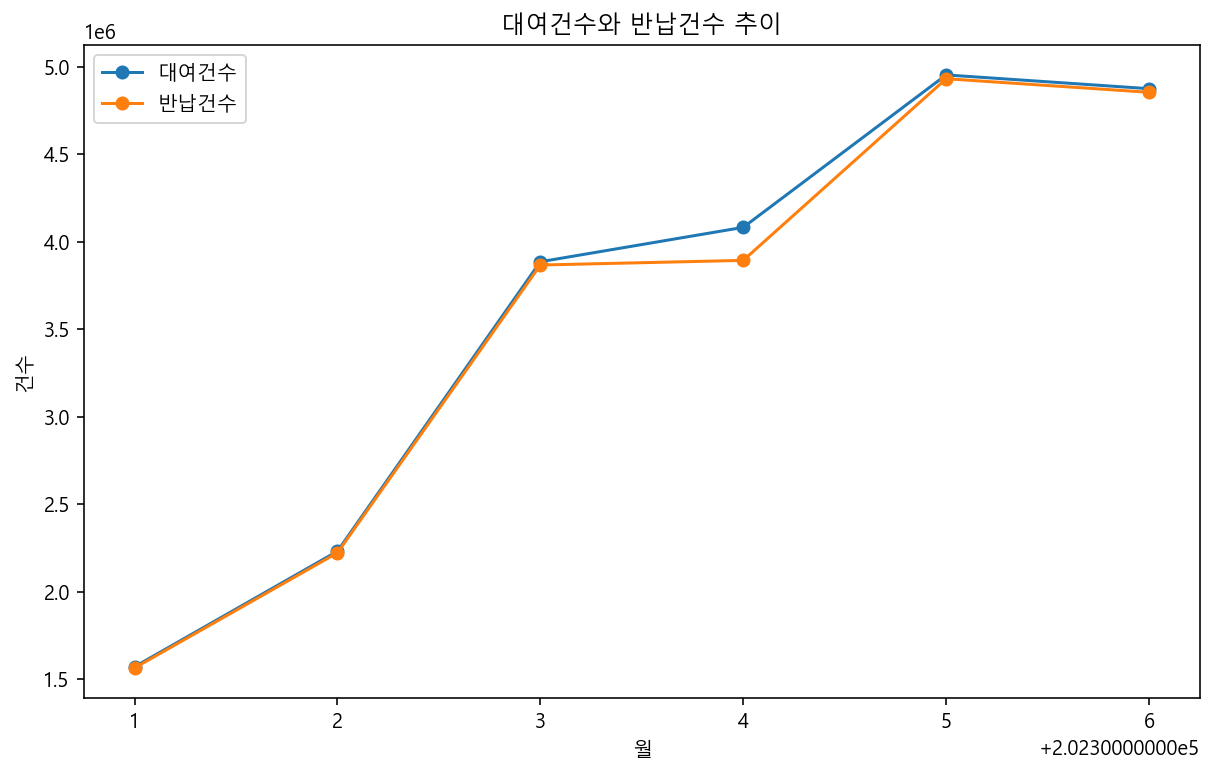

In [13]:
#  라인차트
gr1 = plt.figure(figsize=(10, 6))
gr1 = plt.plot(df3.index, df3['대여건수'], marker='o', label='대여건수')
gr1 = plt.plot(df3.index, df3['반납건수'], marker='o', label='반납건수')

gr1 = plt.xlabel('월')
gr1 = plt.ylabel('건수')
gr1 = plt.title('대여건수와 반납건수 추이')
gr1 = plt.legend()

plt.show()

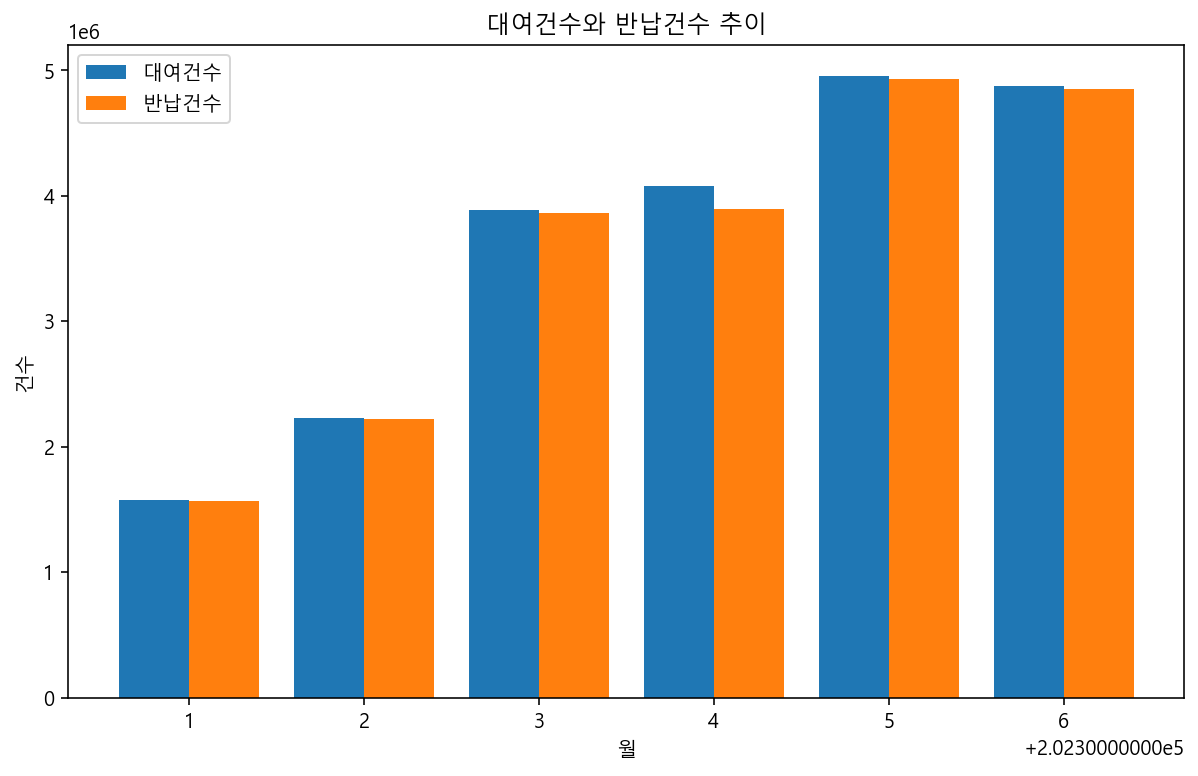

In [79]:
# 바 차트
gr2 = plt.figure(figsize=(10, 6))
gr2 = plt.bar(df3.index - 0.2, df3['대여건수'], width=0.4, label='대여건수')
gr2 = plt.bar(df3.index + 0.2, df3['반납건수'], width=0.4, label='반납건수')

gr2 = plt.xlabel('월')
gr2 = plt.ylabel('건수')
gr2 = plt.title('대여건수와 반납건수 추이')
gr2 = plt.legend()

plt.show()

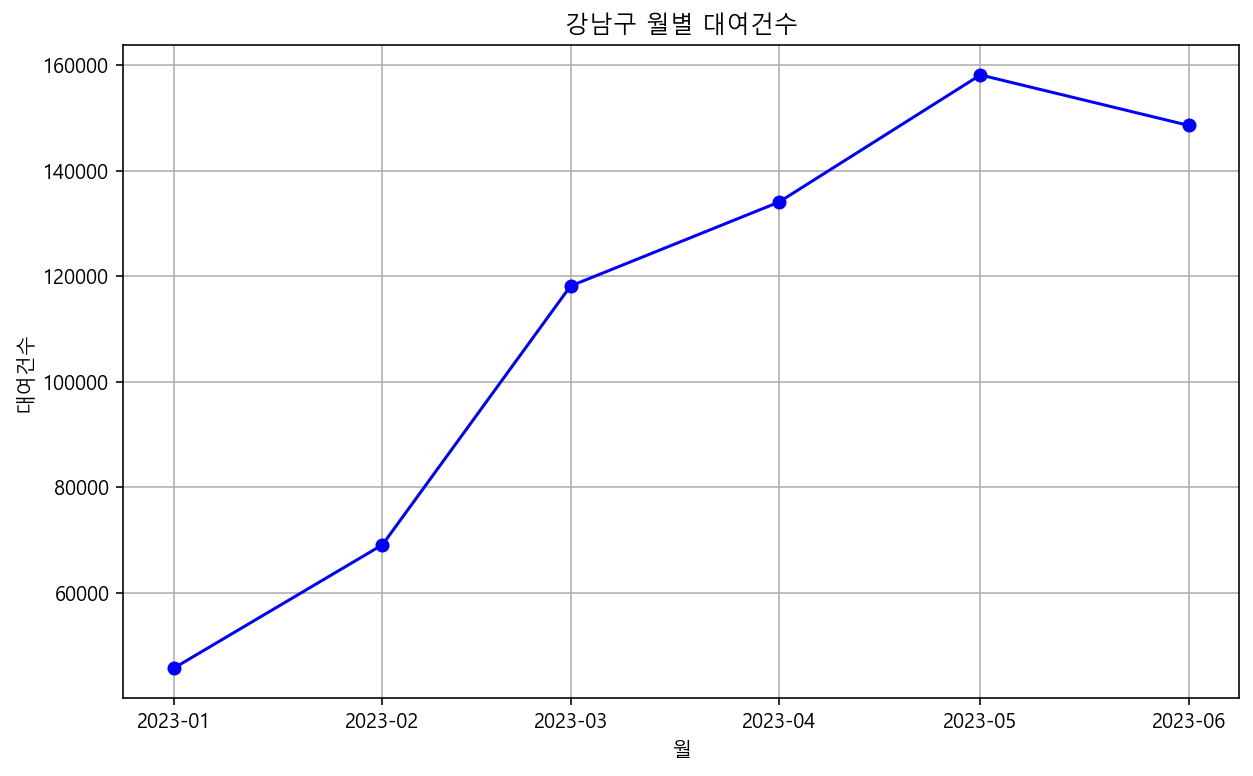

In [73]:
data1['기준년월'] = pd.to_datetime(data1['기준년월'], format='%Y%m')
gangnam_data = data1[data1['자치구'] == '강남구']

gr4 = monthly_sum = gangnam_data.groupby(gangnam_data['기준년월'])['대여건수'].sum()

gr4 = plt.figure(figsize=(10, 6))
gr4 = plt.plot(monthly_sum.index, monthly_sum.values, marker='o', linestyle='-', color='b')
gr4 = plt.title('강남구 월별 대여건수')
gr4 = plt.xlabel('월')
gr4 = plt.ylabel('대여건수')
gr4 = plt.grid(True)

plt.show()

In [60]:
df = data1.pivot_table(index='자치구', values=['대여건수', '반납건수'], aggfunc='sum').reset_index()

print(df)

     자치구     대여건수       반납건수
0    강남구   673634   633867.0
1    강동구   933894   939209.0
2    강북구   335276   328670.0
3    강서구  2425742  2408730.0
4    관악구   540994   529883.0
5    광진구  1053185  1032267.0
6    구로구   860924   854159.0
7    금천구   375621   370767.0
8    노원구  1306650  1294840.0
9    도봉구   450941   451872.0
10  동대문구   771309   783989.0
11   동작구   446626   446828.0
12   마포구  1077748  1078012.0
13  서대문구   435048   412412.0
14   서초구   646206   634898.0
15   성동구   864387   855251.0
16   성북구   529545   528594.0
17   송파구  2019359  2001083.0
18   양천구  1221741  1220666.0
19  영등포구  1756829  1717698.0
20   용산구   445542   438256.0
21   은평구   540462   546061.0
22   종로구   745979   707293.0
23    중구   515286   485318.0
24   중랑구   624881   631987.0


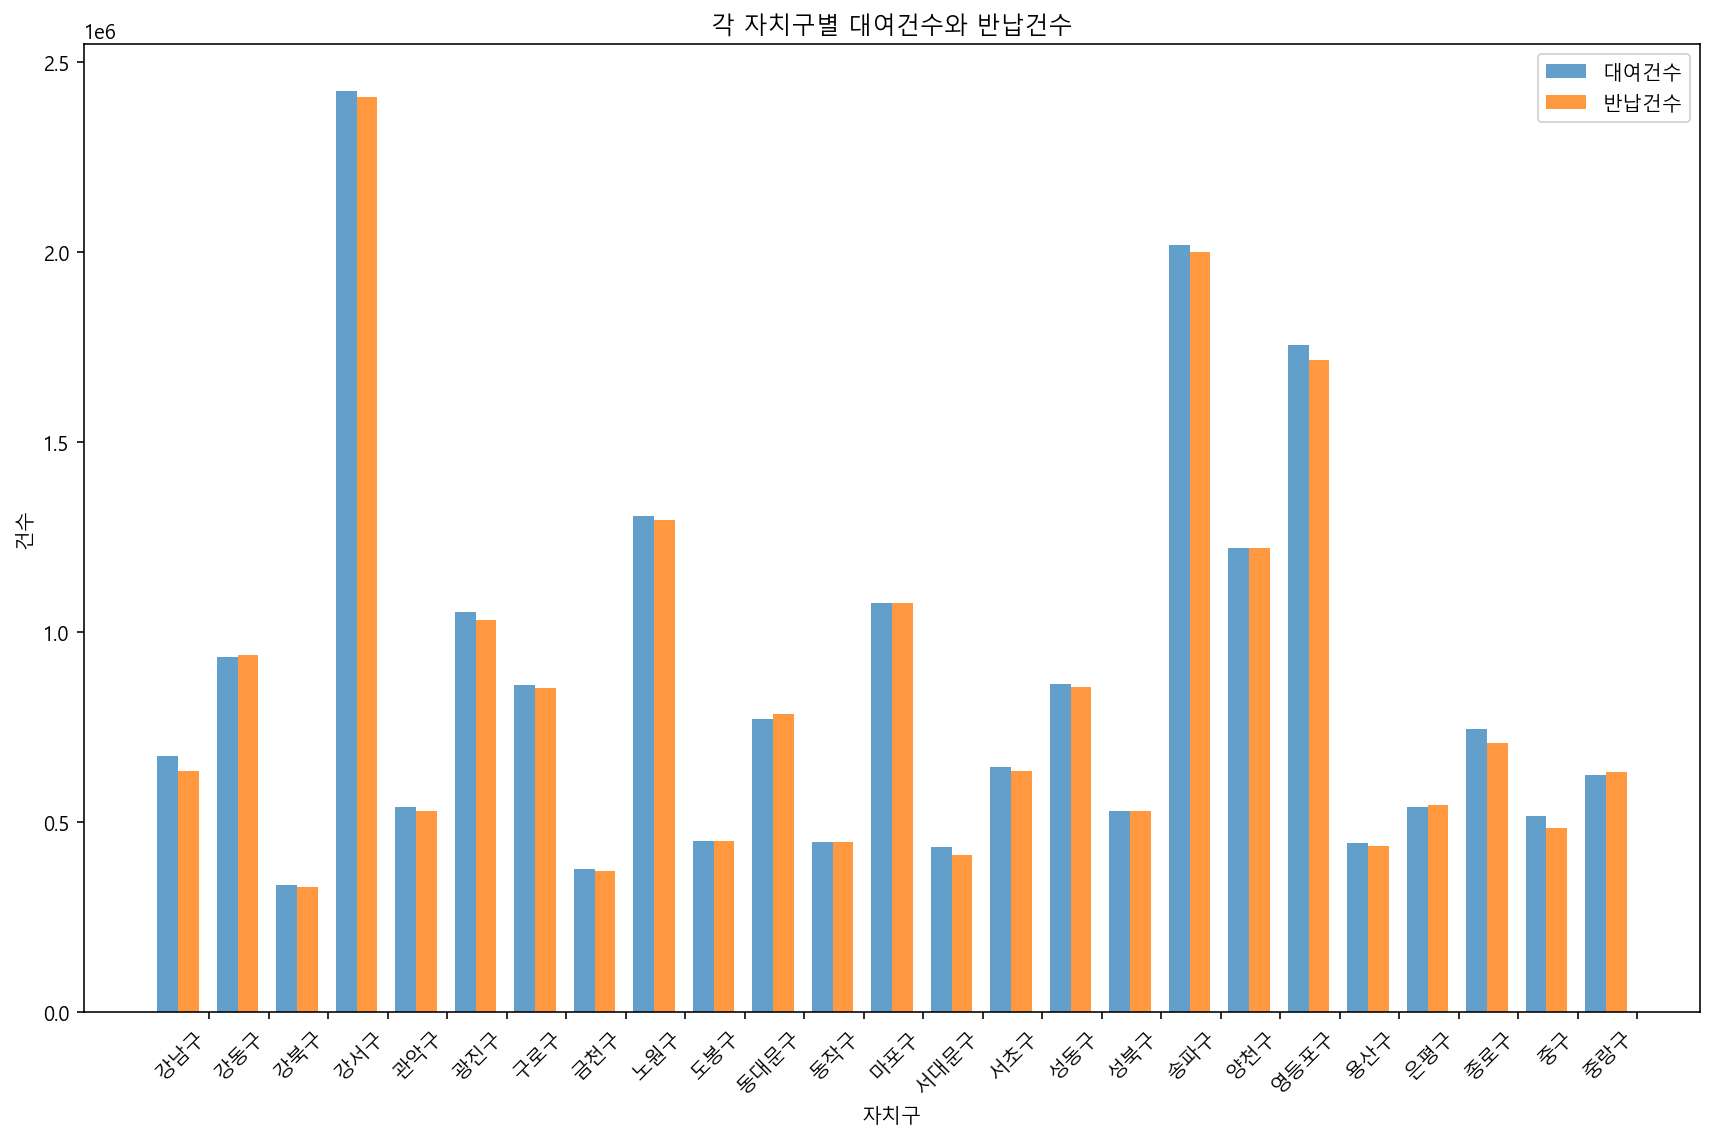

In [67]:
# 막대 그래프 그리기
bar_width = 0.35  # 막대의 폭을 조절
indices = np.arange(len(df['자치구']))

gr3 = plt.figure(figsize=(12, 8))
gr3 = plt.bar(indices, df['대여건수'], width=bar_width, label='대여건수', alpha=0.7)
gr3 = plt.bar(indices + bar_width, df['반납건수'], width=bar_width, label='반납건수', alpha=0.8)
gr3 = plt.xlabel('자치구')
gr3 = plt.ylabel('건수')
gr3 = plt.title('각 자치구별 대여건수와 반납건수')
gr3 = plt.legend()
gr3 = plt.xticks(indices + bar_width / 0.5, df['자치구'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

---

In [18]:
data2 = pd.read_csv("Downloads\\서울특별시 공공자전거 대여이력 정보_2306.csv", encoding="cp949")
data2.shape

(5085460, 16)

In [19]:
data2[:8]

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID
0,SPB-57232,2023-06-01 00:00:04,4652,신사두산위브2차아파트 앞,0,2023-06-01 00:00:07,04652,신사두산위브2차아파트 앞,0,0,0.0,1961,\N,내국인,ST-2425,ST-2425
1,SPB-34772,2023-06-01 00:00:09,4162,노량진1동 청소년독서실,0,2023-06-01 00:00:11,04162,노량진1동 청소년독서실,0,0,0.0,1971,M,내국인,ST-2652,ST-2652
2,SPB-56834,2023-06-01 00:00:15,4886,배명고등학교 건너편,0,2023-06-01 00:00:29,04886,배명고등학교 건너편,0,0,0.0,1998,M,내국인,ST-2986,ST-2986
3,SPB-31592,2023-06-01 00:00:24,147,마포역 4번출구 뒤,0,2023-06-01 00:00:41,00147,마포역 4번출구 뒤,0,0,0.0,1996,\N,내국인,ST-205,ST-205
4,SPB-56197,2023-06-01 00:00:33,3517,용마사거리,0,2023-06-01 00:01:01,03517,용마사거리,0,0,0.0,\N,F,내국인,ST-1266,ST-1266
5,SPB-43318,2023-06-01 00:00:23,551,구의삼성쉐르빌 앞,0,2023-06-01 00:01:20,00551,구의삼성쉐르빌 앞,0,0,0.0,1998,M,내국인,ST-377,ST-377
6,SPB-45918,2023-06-01 00:01:50,398,을지로3가역 3번출구,0,2023-06-01 00:01:59,00398,을지로3가역 3번출구,0,0,0.0,2003,M,내국인,ST-1435,ST-1435
7,SPB-40628,2023-06-01 00:01:33,2739,수명산파크1단지교차로,0,2023-06-01 00:02:03,02739,수명산파크1단지교차로,0,0,0.0,1983,\N,내국인,ST-2056,ST-2056


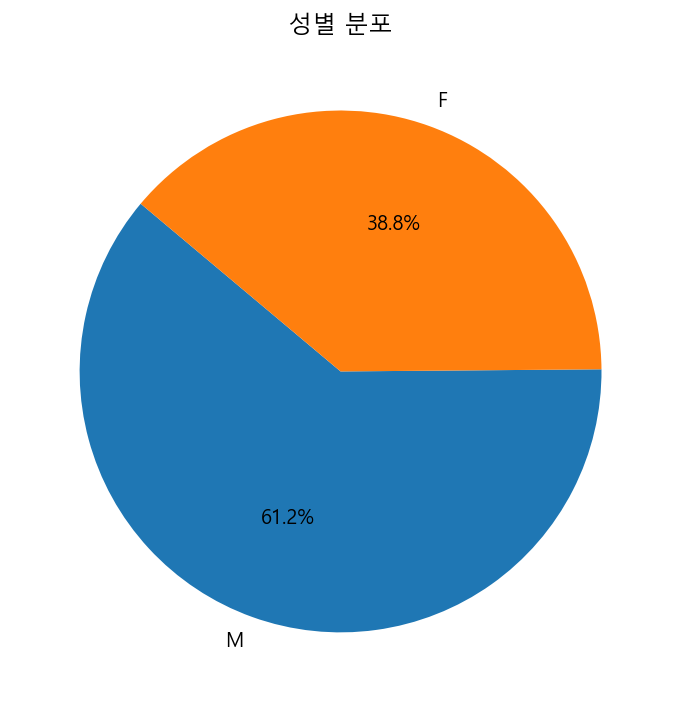

In [20]:
# '\N' 값을 NaN으로 대체
data2['성별'] = data2['성별'].replace('\\N', pd.NA)

# 'm'과 'f' 제외
gender_counts = data2[data2['성별'].isin(['M', 'F'])]['성별'].value_counts()

gr5 = plt.figure(figsize=(6, 6))
gr5 = plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
gr5 = plt.title('성별 분포')

plt.show()

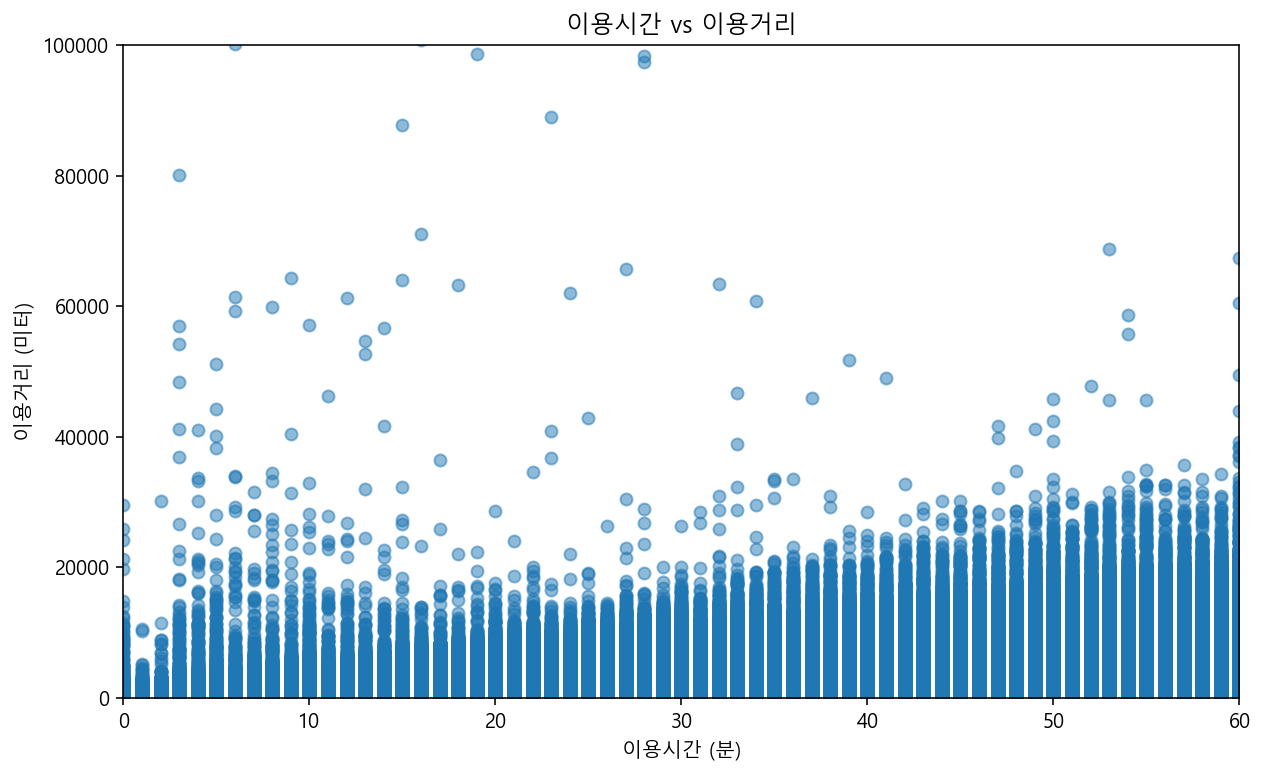

In [21]:
usage_time = data2['이용시간(분)']
distance = data2['이용거리(M)']

gr6 = plt.figure(figsize=(10, 6))
gr6 = plt.scatter(usage_time, distance, alpha=0.5)
gr6 = plt.title('이용시간 vs 이용거리')
gr6 = plt.xlabel('이용시간 (분)')
gr6 = plt.ylabel('이용거리 (미터)')
gr6 = plt.xlim(0, 60)
gr6 = plt.ylim(0,100000)

plt.show()

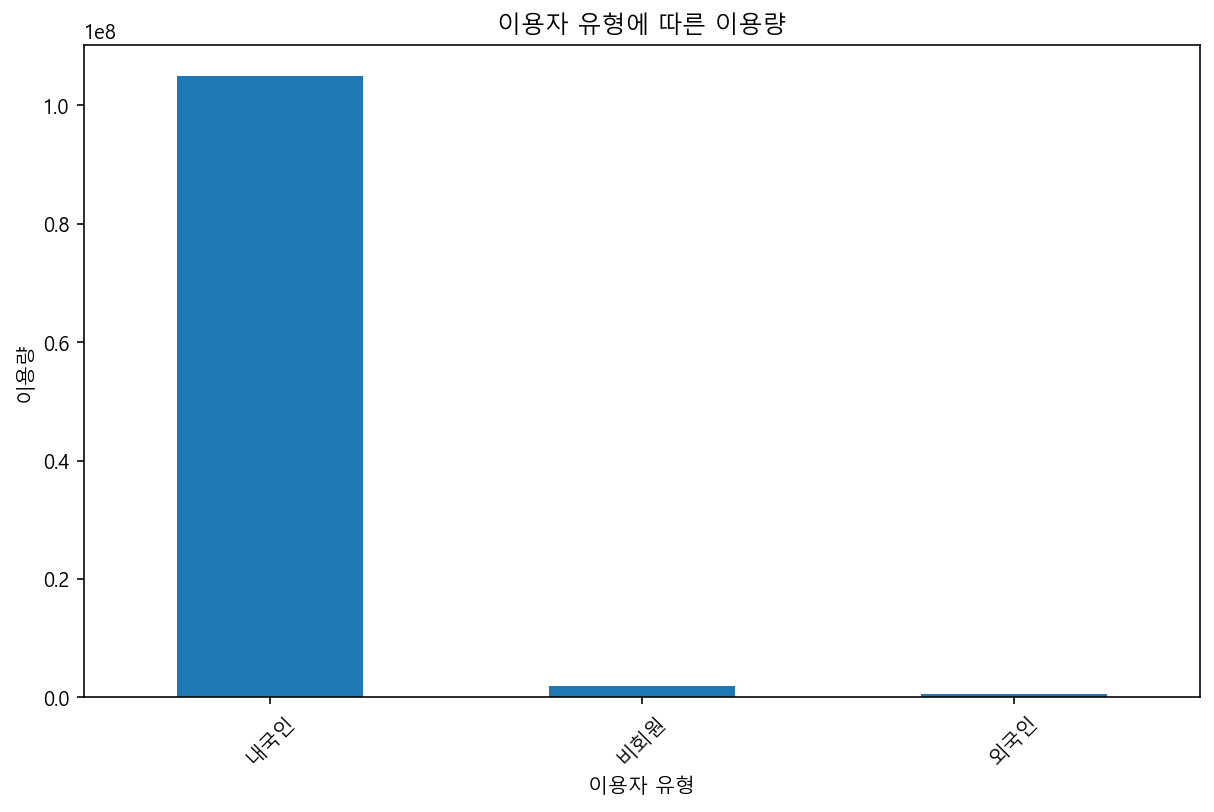

In [22]:
usage_by_user_type = data2.groupby('이용자종류')['이용시간(분)'].sum()

gr7 = plt.figure(figsize=(10, 6))
gr7 = usage_by_user_type.plot(kind='bar')
gr7 = plt.title('이용자 유형에 따른 이용량')
gr7 = plt.xlabel('이용자 유형')
gr7 = plt.ylabel('이용량')
gr7 = plt.xticks(rotation=45)

plt.show()

---

In [42]:
data3 = pd.read_csv("Downloads\\서울특별시 공공자전거 일별 대여건수_23.1-6.csv", encoding="cp949")
data3.shape

(180, 6)

In [43]:
data3[:5]

,대여일시,대여건수,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,2023-01-01,"38,037",NaN,NaN,NaN,NaN
1,2023-01-02,"56,609",NaN,NaN,NaN,NaN
2,2023-01-03,"61,252",NaN,NaN,NaN,NaN
3,2023-01-04,"67,721",NaN,NaN,NaN,NaN
4,2023-01-05,"68,711",NaN,NaN,NaN,NaN


In [44]:
data3['월']=data3['대여일시'].map(lambda x: int(x.split('-')[1]))
data3=data3.loc[data3['월']>=0, ['월','대여건수']]

data3

,월,대여건수
0,1,"38,037"
1,1,"56,609"
2,1,"61,252"
3,1,"67,721"
4,1,"68,711"
...,...,...
175,6,"133,566"
176,6,"179,792"
177,6,"185,929"
178,6,"35,326"


<Figure size 720x432 with 0 Axes>

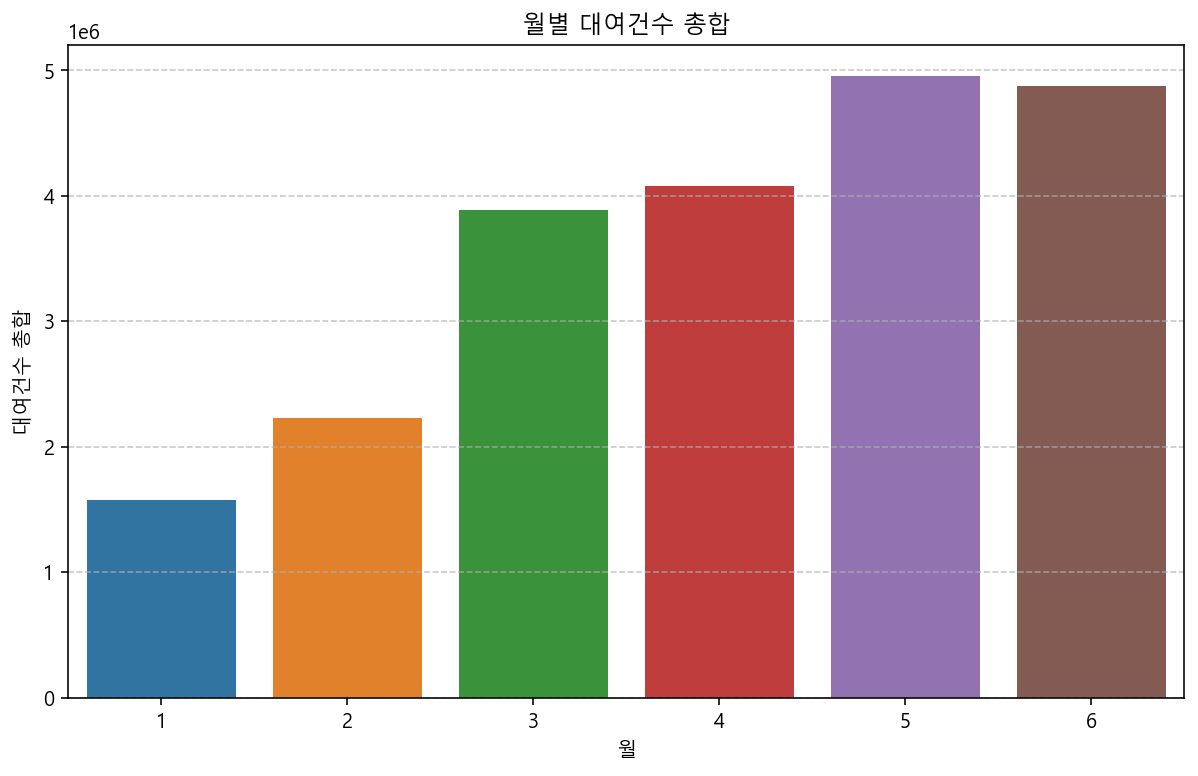

In [45]:
data3['대여건수'] = data3['대여건수'].str.replace(',', '').astype(int)
monthly_sum = data3.groupby('월')['대여건수'].sum().reset_index()

df1 = monthly_sum.pivot_table(index='월', values='대여건수')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='월', y='대여건수', data=monthly_sum)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)

gr8 = plt.xlabel('월')
gr8 = plt.ylabel('대여건수 총합')
gr8 = plt.title('월별 대여건수 총합')

plt.show()

<Figure size 720x432 with 0 Axes>

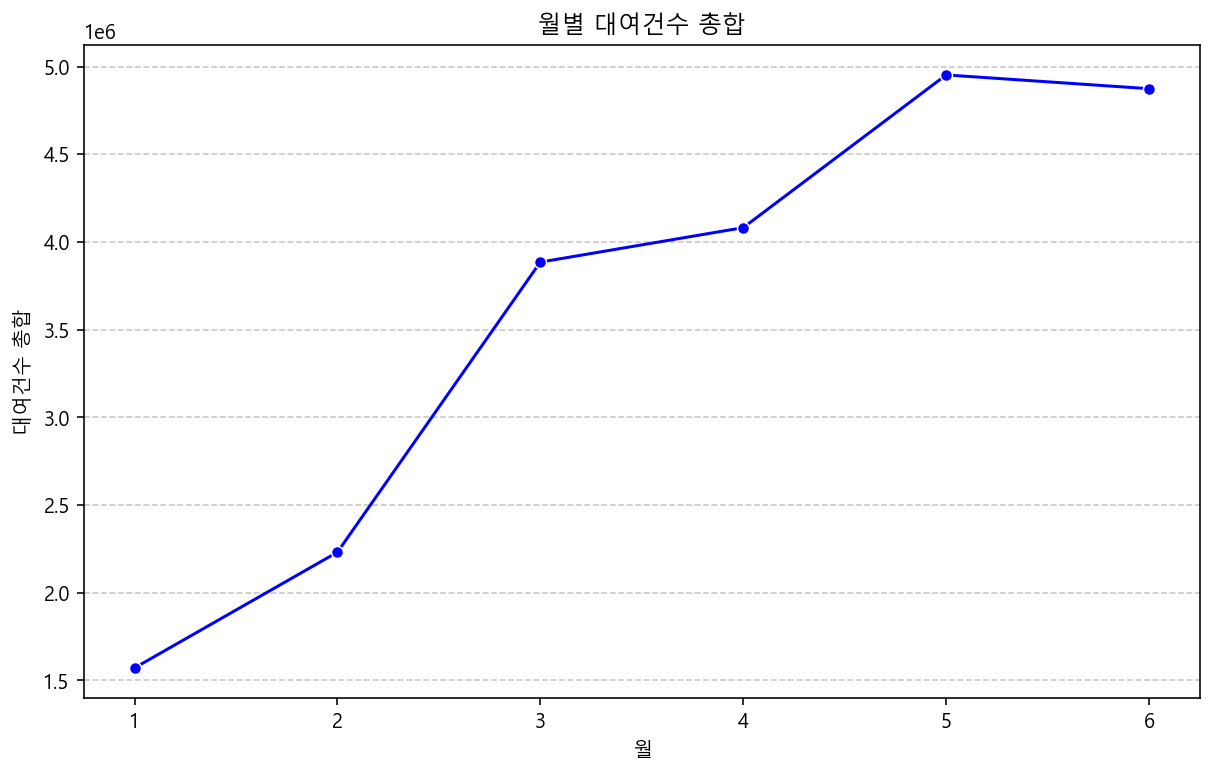

In [46]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='월', y='대여건수', data=monthly_sum, marker='o', color='blue')
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

gr8 = plt.xlabel('월')
gr8 = plt.ylabel('대여건수 총합')
gr8 = plt.title('월별 대여건수 총합')

plt.show()

---

In [80]:
data4 = pd.read_csv("Downloads\\공공자전거 대여소 정보(23.06월 기준).csv", encoding="cp949")
data4.shape

(2749, 10)

In [81]:
data4[:5]

,대여소 번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치 시기,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451,2015-10-07,NaN,NaN,NaN
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.575947,126.974060,2015-10-07,NaN,NaN,NaN
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.571770,126.974663,2015-10-07,NaN,NaN,NaN
3,305,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.572559,126.978332,2015-01-07,NaN,NaN,NaN
4,307,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.570000,126.971100,2015-10-07,NaN,NaN,NaN


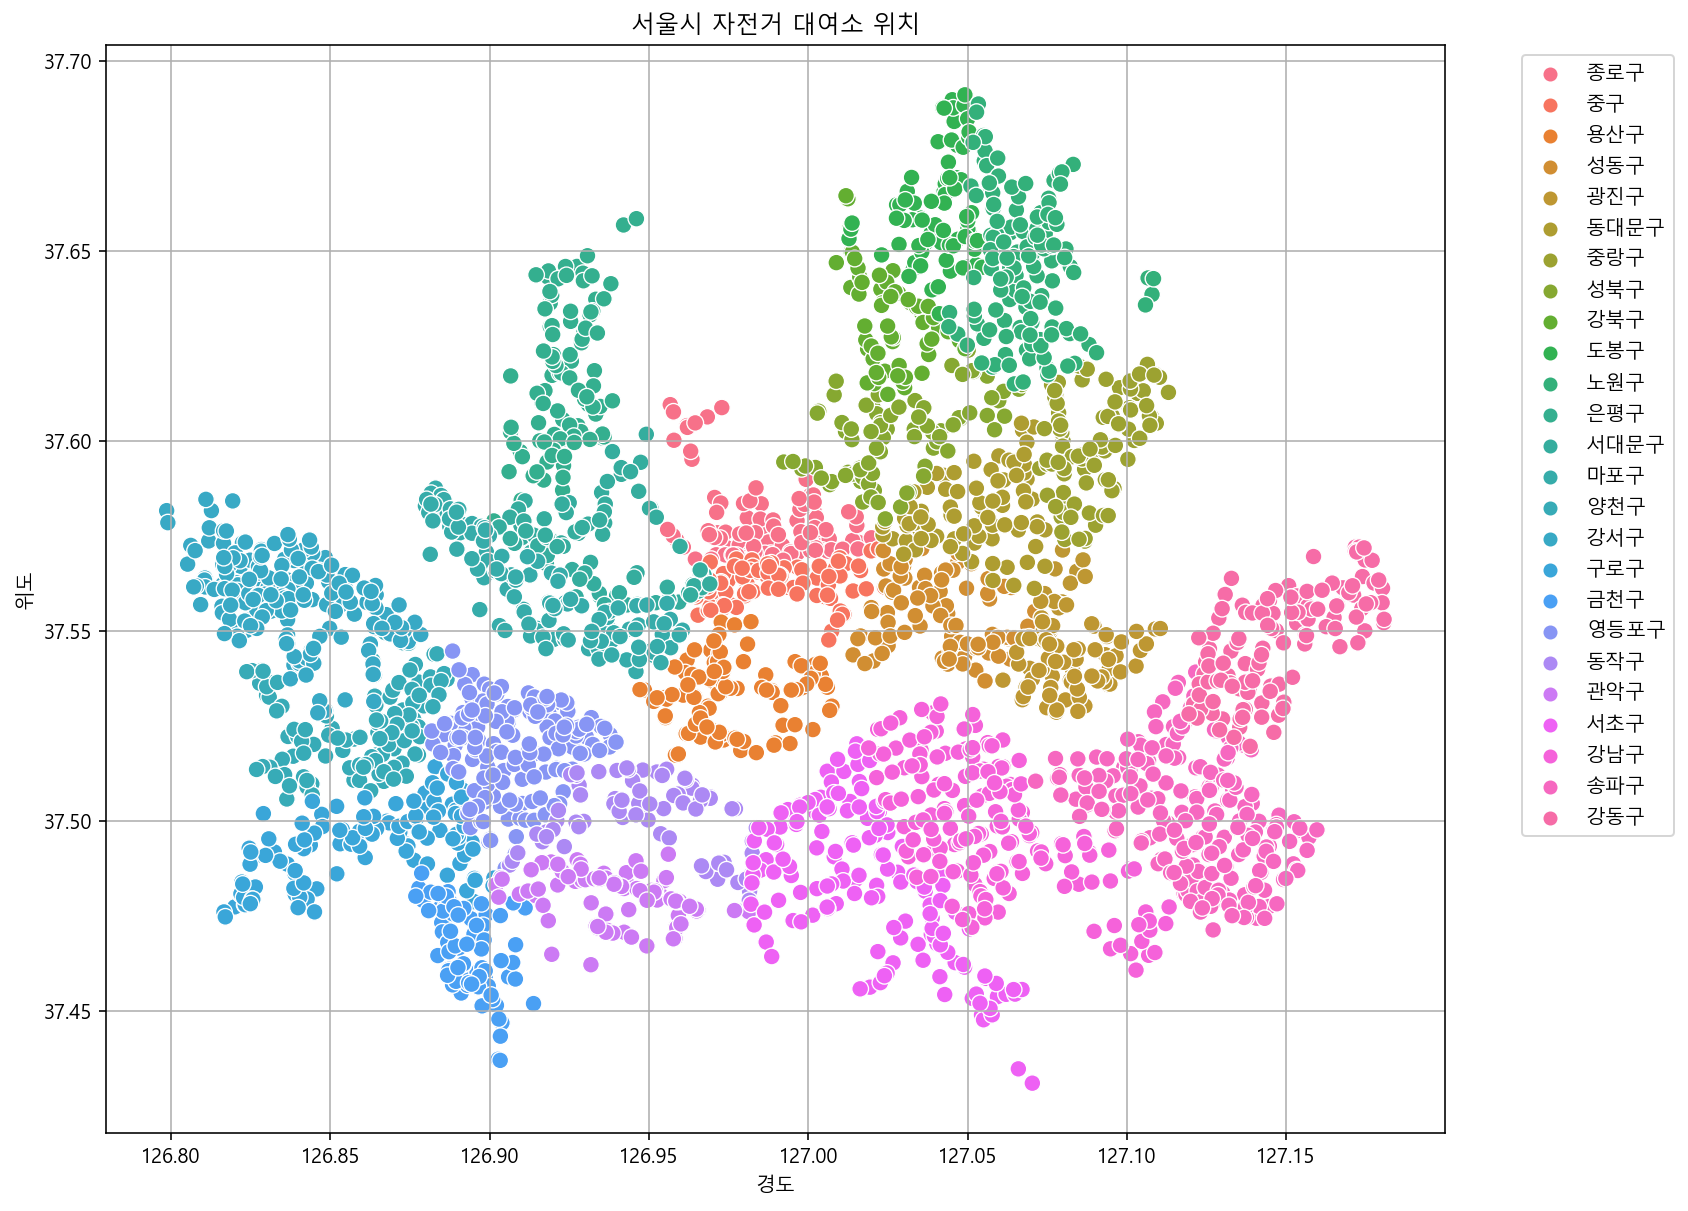

In [82]:
# "설치 시기" 열의 데이터를 년도로 변환
data4['설치 시기'] = pd.to_datetime(data4['설치 시기']).dt.year

df9 = plt.figure(figsize=(12, 10))
df9 = sns.scatterplot(x='경도', y='위도', hue='자치구', data=data4, s=70)
df9 = plt.title('서울시 자전거 대여소 위치')
df9 = plt.xlabel('경도')
df9 = plt.ylabel('위도')
df9 = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
df9 = plt.grid(True)
plt.show()

<Figure size 720x432 with 0 Axes>

Text(-0.001, 218.05, '218')

Text(0.999, 189.05, '189')

Text(1.999, 171.05, '171')

Text(2.999, 155.05, '155')

Text(3.999, 148.05, '148')

Text(4.999, 136.05, '136')

Text(5.999, 122.05, '122')

Text(6.999, 120.05, '120')

Text(7.999, 114.05, '114')

Text(8.999, 112.05, '112')

Text(9.999, 103.05, '103')

Text(10.999, 98.05, '98')

Text(11.999, 93.05, '93')

Text(12.999, 92.05, '92')

Text(13.999, 91.05, '91')

Text(14.999, 88.05, '88')

Text(15.999, 86.05, '86')

Text(16.999, 84.05, '84')

Text(17.999, 82.05, '82')

Text(18.999, 81.05, '81')

Text(19.999, 79.05, '79')

Text(20.999, 76.05, '76')

Text(21.999, 76.05, '76')

Text(22.999, 74.05, '74')

Text(23.999, 61.05, '61')

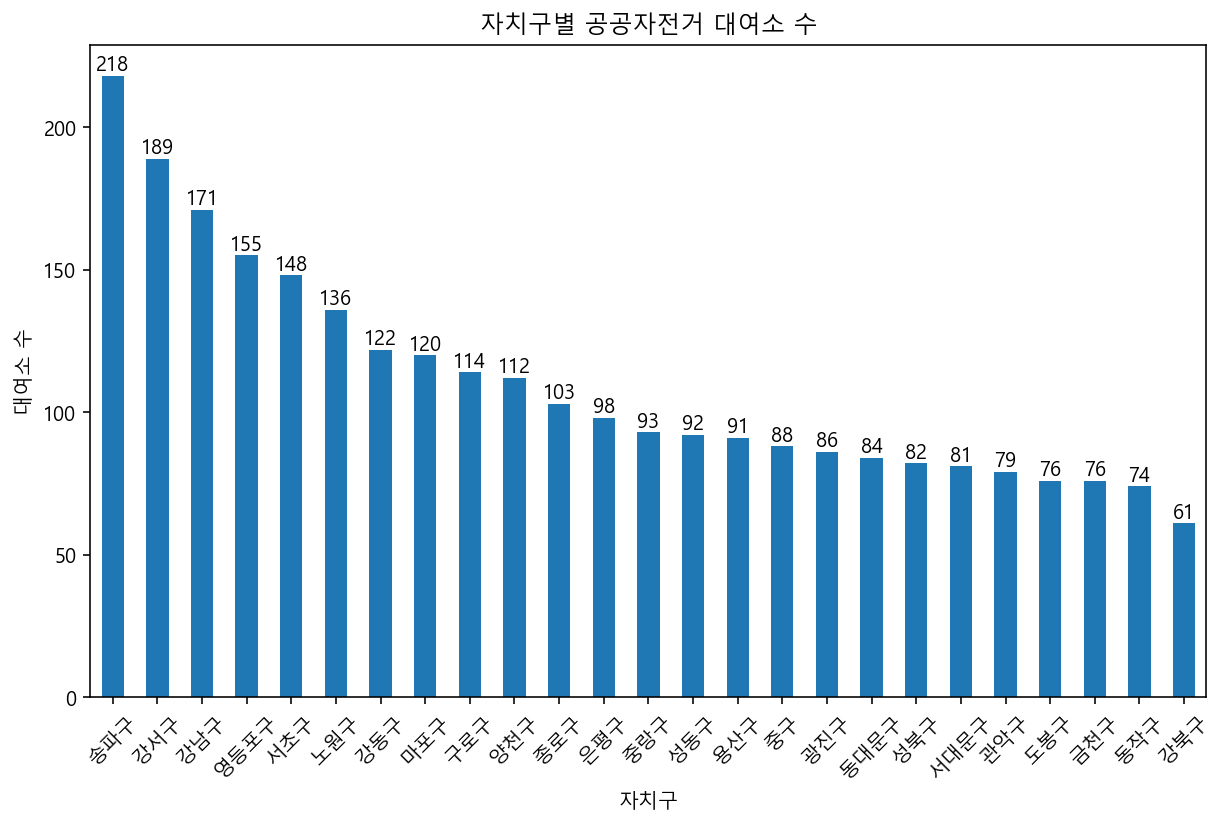

In [54]:
# 자치구별 대여소 수 계산
count_by_district = data4['자치구'].value_counts()

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
bars = count_by_district.plot(kind='bar')

# 각 막대에 값을 텍스트로 표시
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.001, bar.get_height() + 0.05, f'{bar.get_height()}', ha='center', va='bottom', color='black')

# 그래프에 라벨, 제목 추가
df11 = plt.xlabel('자치구')
df11 = plt.ylabel('대여소 수')
df11 = plt.title('자치구별 공공자전거 대여소 수')
df11 = plt.xticks(rotation=45)

# 그래프 보여주기
plt.show()